In [1]:
import numpy as np
from numpy.linalg import eig
from numpy.linalg import inv,pinv
import pandas as pd
import csv
from collections import defaultdict
from functools import partial
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from IPython.display import display
import math
%run common_functions.ipynb
%run naive_bayes_classifier.ipynb
%run logisticRegression.ipynb

x:  (1797, 64)
y:  (1797, 1)
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [2]:
with open('digits.csv', 'r') as csvfile:
    digitDataset = np.asarray(list(csv.reader(csvfile, quoting=csv.QUOTE_NONNUMERIC)))
    
x = digitDataset[:, :-1]
y = digitDataset[:, -1:]
print("x: ", x.shape)
print("y: ", y.shape)
print(np.unique(y))


x:  (1797, 64)
y:  (1797, 1)
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [ ]:
# initialize Logistic regression. Default maximum iteration for gradient descent  is 5000
# and thresold for cost is 0.001
lg = LogisticRegression()
# initialize Naive Bayes
nb = naive_bayes_classifier()

# k-fold cross validaion
k = 10
# get the train and test indices for k-fold cross validation
k_folded_train_indices, k_folded_test_indices = get_k_fold_indices(k, y.shape[0], shuffle=True)

folds_errors = []

for fold, train_indices in enumerate(k_folded_train_indices):
    print(f'Fold#{fold + 1} of {k}:')
    test_indices = k_folded_test_indices[fold]
    
    train_x = x[train_indices]
    test_x = x[test_indices]
    train_y = y[train_indices]
    test_y = y[test_indices]
    
    class_costs = lg.fit(train_x, train_y)
    nb.fit(train_x, train_y)

    train_accuracy, train_predictions = lg.predict(train_x, train_y)
    test_accuracy, test_predictions = lg.predict(test_x, test_y)
    nb_train_accuracy, nb_train_predictions = nb.predict(train_x, train_y)
    nb_test_accuracy, nb_test_predictions = nb.predict(test_x, test_y)
#     print(train_accuracy)
    folds_errors.append([100 - train_accuracy, 100 - test_accuracy, 100 - nb_train_accuracy, 100 - nb_test_accuracy])

errors_df = pd.DataFrame(folds_errors, columns = ["LG Train errors(%)", "LG Test errors(%)", "NB rain errors(%)", "NB Test errors(%)"])
errors_df

Fold#1 of 10:


/home/hasan/Installations/miniconda3/envs/AML/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log
/home/hasan/Installations/miniconda3/envs/AML/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in multiply


Logistic Regression Progress: |██████████████████████████████████████████████████| 100.0% Complete


/home/hasan/Installations/miniconda3/envs/AML/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/home/hasan/Installations/miniconda3/envs/AML/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide
/home/hasan/Installations/miniconda3/envs/AML/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


Fold#2 of 10:
Logistic Regression Progress: |██████████████████████████████████████████████████| 100.0% Complete
Fold#3 of 10:
Logistic Regression Progress: |██████████████████████████████████████████████████| 100.0% Complete
Fold#4 of 10:
Logistic Regression Progress: |██████████████████████████████████████████████████| 100.0% Complete
Fold#5 of 10:
Logistic Regression Progress: |██████████████████████████████████████████████████| 100.0% Complete
Fold#6 of 10:
Logistic Regression Progress: |██████████████████████████████████████████████████| 100.0% Complete
Fold#7 of 10:
Logistic Regression Progress: |██████████████████████████████████████████████████| 100.0% Complete
Fold#8 of 10:
Logistic Regression Progress: |██████████████████████████████████████████████████| 100.0% Complete
Fold#9 of 10:
Logistic Regression Progress: |██████████████████████████████████████████████████| 100.0% Complete


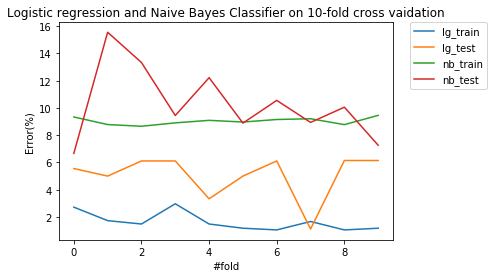

In [4]:
folds_errors = np.asarray(folds_errors)
labels = ["lg_train", "lg_test", "nb_train", "nb_test"]

for i in range(folds_errors.shape[1]):
    plt.plot(folds_errors[:, i], label=labels[i])
    
plt.xlabel("#fold")
plt.ylabel("Error(%)")
plt.title(f"Logistic regression and Naive Bayes Classifier on {k}-fold cross vaidation")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)
plt.show()

In [5]:
# 80-20 split
train_indices, test_indices = get_train_test_indices_by_train_percentage(80, y.shape[0], shuffle=True)
train_x = x[train_indices]
test_x = x[test_indices]
train_y = y[train_indices]
test_y = y[test_indices]

class_costs = lg.fit(train_x, train_y)
nb.fit(train_x, train_y)

split_train_accuracy, split_train_predictions = lg.predict(train_x, train_y)
split_test_accuracy, split_test_predictions = lg.predict(test_x, test_y)
split_nb_train_accuracy, split_nb_train_predictions = nb.predict(train_x, train_y)
split_nb_test_accuracy, split_nb_test_predictions = nb.predict(test_x, test_y)

split_errors = [[100 - split_train_accuracy, 100 - split_test_accuracy, 100 - split_nb_train_accuracy, 100 - split_nb_test_accuracy]]

split_errors_df = pd.DataFrame(split_errors, columns = ["LG Train errors(%)", "LG Test errors(%)", "NB rain errors(%)", "NB Test errors(%)"])
print(split_errors_df)

/home/hasan/Installations/miniconda3/envs/AML/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log
/home/hasan/Installations/miniconda3/envs/AML/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in multiply


Logistic Regression Progress: |██████████████████████████████████████████████████| 100.0% Complete


/home/hasan/Installations/miniconda3/envs/AML/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/home/hasan/Installations/miniconda3/envs/AML/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide
/home/hasan/Installations/miniconda3/envs/AML/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide


   LG Train errors(%)  LG Test errors(%)  NB rain errors(%)  NB Test errors(%)
0            2.155772           4.735376           9.040334           9.749304
